<a href="https://colab.research.google.com/github/Sharma-Pranav/DeepLearning/blob/master/creating_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [0]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

# Load Dataset 
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download = True, train = True, transform = transform)

# Loading data to dataloader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [36]:
# Turning trainloader into iterator
dataiter = iter(trainloader)

# Get first batch
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


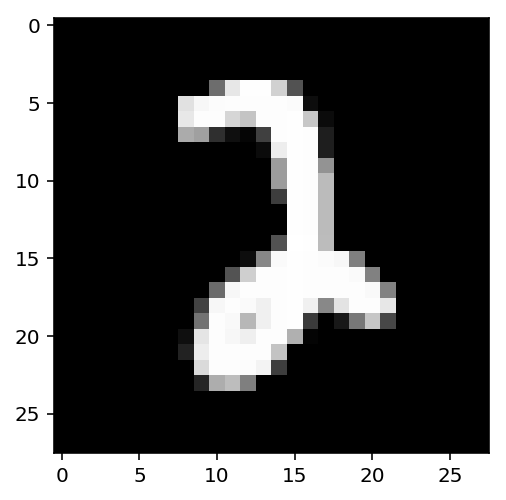

In [37]:
# See one image in this batch
plt.imshow(images[2].numpy().squeeze(), cmap='Greys_r');

In [0]:
def activation(x):
  return 1/(1+ torch.exp(-x))

In [0]:
# Flatten input images
inputs = images.view(images.shape[0], -1)

In [0]:
# Create a custom network
 
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)
output = torch.mm(h, w2) + b2

In [41]:
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x), dim = 1).view(-1, 1)

probabilities = softmax(output)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)
# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [0]:
# Building Neural Network using nn Module in Pytorch

from torch import nn

In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    
    # Inputs to hidden layer transformation
    self.hidden = nn.Linear(784, 256)
    # Output layer, 10 units - one for each digit
    self.output = nn.Linear(256, 10)
    
    #Sigmoid and Softmax
    self.sigmoid = nn.Sigmoid()
    self.softmax = nn.Softmax(dim = 1)
  def forward(self, x):
    # Pass the input tensor through each of our operations
    x = self.hidden(x)
    x = self.sigmoid(x)
    x = self.output(x)
    x = self.sofmax(x)
    
    return x

In [0]:
model = Network()


In [45]:
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [0]:
import torch.nn.functional as F

class Network(nn.Module):
  def __init__(self):
    super().__init__()
    # Inputs to hidden layer linear transformation
    self.hidden = nn.Linear(784, 256)
    # Output layer, 10 units - one for each digit
    self.output = nn.Linear(256, 10)
    
  def forward(self,x):
    # Hidden layer with sigmoid activation
    x = F.sigmoid(self.hidden(x))
    # Output layer with softmax activation
    x = F.softmax(self.output(x), dim=1)

    return x

In [47]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [48]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)
  
  def forward(self, x):
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = F.softmax(x, dim = 1)
    
    return x
  
model = Network()

model


Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [49]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0181, -0.0050,  0.0155,  ..., -0.0041, -0.0257,  0.0163],
        [-0.0149,  0.0083, -0.0118,  ..., -0.0301,  0.0218,  0.0109],
        [ 0.0238, -0.0231, -0.0220,  ..., -0.0138,  0.0205, -0.0038],
        ...,
        [-0.0268,  0.0086,  0.0039,  ...,  0.0079, -0.0235,  0.0177],
        [ 0.0314,  0.0083, -0.0233,  ...,  0.0248,  0.0160, -0.0256],
        [ 0.0260,  0.0202,  0.0107,  ...,  0.0302, -0.0148, -0.0008]],
       requires_grad=True)
Parameter containing:
tensor([ 4.2308e-03, -5.1769e-03,  2.2795e-03,  2.0525e-02,  2.7375e-02,
         7.4834e-03,  2.7314e-03,  2.4009e-02, -3.1007e-02,  2.5556e-02,
         6.9962e-03, -1.0515e-02, -2.1656e-02, -3.5069e-02, -3.3269e-03,
         2.6307e-02, -2.1659e-02, -1.6634e-02, -2.0207e-03,  1.3315e-02,
        -2.2613e-02,  2.2102e-02,  1.8963e-02, -3.3425e-02,  2.8457e-02,
        -2.4785e-03,  6.0197e-03,  1.7807e-02, -3.8333e-05,  8.9894e-03,
         3.4642e-02, -1.2069e-02, -3.4407e-02,  1.1491e-0

In [50]:
# Initialissing weights in layers
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [51]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[ 1.7232e-02, -2.9995e-03,  1.2821e-02,  ...,  1.5167e-03,
          4.2092e-03, -1.2208e-02],
        [ 8.3633e-03,  3.3282e-03, -1.3362e-02,  ...,  9.5080e-03,
          2.4120e-03,  1.0323e-02],
        [-4.1456e-03, -1.9915e-02, -5.8720e-03,  ...,  4.7128e-03,
          3.0893e-03, -2.8556e-03],
        ...,
        [-1.3949e-02,  1.3230e-02,  1.7619e-03,  ...,  5.8643e-03,
          1.2524e-03, -3.7149e-03],
        [-1.1159e-02, -1.0131e-02,  5.6017e-03,  ...,  7.2269e-03,
         -1.2406e-02,  6.2714e-03],
        [-1.0025e-02,  2.9062e-02, -1.3480e-02,  ...,  1.4953e-02,
          6.1540e-05, -2.1731e-02]])

In [0]:
# Grab data from iterator
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)

# # Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx, :])


In [53]:
ps

tensor([[0.0150, 0.0147, 0.0147, 0.0147, 0.0153, 0.0197, 0.0147, 0.0147, 0.0147,
         0.0147, 0.0173, 0.0147, 0.0147, 0.0182, 0.0150, 0.0147, 0.0185, 0.0152,
         0.0153, 0.0174, 0.0147, 0.0150, 0.0147, 0.0147, 0.0147, 0.0181, 0.0147,
         0.0168, 0.0151, 0.0147, 0.0147, 0.0148, 0.0147, 0.0149, 0.0181, 0.0179,
         0.0147, 0.0153, 0.0165, 0.0147, 0.0160, 0.0190, 0.0167, 0.0162, 0.0155,
         0.0147, 0.0196, 0.0147, 0.0159, 0.0155, 0.0159, 0.0152, 0.0148, 0.0147,
         0.0147, 0.0147, 0.0166, 0.0147, 0.0147, 0.0168, 0.0147, 0.0149, 0.0147,
         0.0148]], grad_fn=<SoftmaxBackward>)

In [54]:
ps.shape

torch.Size([1, 64])

In [57]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


In [58]:

from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('output', nn.Linear(hidden_sizes[1], output_size)),
                      ('softmax', nn.Softmax(dim=1))]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax()
)